# iRobot Data Science Coding Challenge

## Project Name: Geo and Mission Data Analysis for the Robot Performance Measurement

### Background of the Project:

iRobot has a series of wifi-connected robotic vacuum cleaners available for sale worldwide. These robots are capable of autonomously navigating a home to vacuum its floors. Upon mission completion, they send a summary report of the mission to 
cloud services, where it is processed and stored as a row in a Postgres database. However, any cleaning mission performed while the robot is not connected to wifi (either by user's choice or a faulty connection) will not be saved in the database. In 
addition, there are  occasional periods where cloud services malfunction and no missions are reported, resulting in discrete periods of data loss.

These robots are programmed with an automatic recharge and resume function, which means that when the robot detects its battery  levels reaching critically low levels, it will navigate back to the charging dock if available and charge for up to 90 minutes before resuming the mission. In addition, if a robot becomes stuck on an obstacle in its environment or is manually paused by a button press, it will cease cleaning for up to 90 minutes before terminating the mission. If the user restarts the mission with a button press within 90 minutes of the pause, the robot will continue cleaning normally. The number of minutes spent cleaning, charging, or paused are reported for each mission, as is the mission outcome (a field describing whether the mission was cancelled, the robot got stuck, the battery died, or the robot completed the job successfully).

### Getting Started with the Project:

To begin working with the iRobot data, we'll first need to import the functionality we need, and load our data into a pandas DataFrame.
Run the code cell below to load our data and display the first few entries (passengers) for examination using the .head() function.

In [8]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

In [10]:
# Load the dataset of Mission Data
# mission_data_file = 'mission_data.csv'
# mission_df = pd.read_csv(mission_data_file)
mission_df=pd.read_csv (r'C:\Users\MdKhurramMonirRabby\Documents\GitHub\Geo-and-Mission-Data-Analysis-for-the-Robot-Performance-Measurement\mission_data.csv')
# Print the first few entries of the Mission Data of iRobot
# display(df.info())
mission_df.head(n =10)

,robotid,datetime,nmssn,runm,chrgm,pausem,outcome
0,000NG2FMLJBT9ANZ,2017-10-01 16:17:22,40,3,1,2,stuck
1,000NG2FMLJBT9ANZ,2017-10-03 14:25:56,41,83,0,13,ok
2,000NG2FMLJBT9ANZ,2017-10-04 12:32:51,42,66,13,12,ok
3,000NG2FMLJBT9ANZ,2017-10-26 02:12:55,45,72,24,0,cncl
4,000NG2FMLJBT9ANZ,2017-10-27 07:17:39,46,61,9,0,cncl
5,000Y9NBMJ77LQ7S7,2016-11-28 05:41:25,55,61,0,13,ok
6,000Y9NBMJ77LQ7S7,2016-12-20 10:06:42,56,31,0,6,cncl
7,000Y9NBMJ77LQ7S7,2017-02-18 03:16:40,57,11,0,2,cncl
8,000Y9NBMJ77LQ7S7,2017-03-08 10:49:36,58,78,0,0,ok
9,000Y9NBMJ77LQ7S7,2017-03-19 10:21:15,59,99,0,0,cncl


From a sample of the Mission data, we can see the following features present for a sample of 10,000 wifi-connected robots performance analysis:
* **robotid**: a unique robot identifier
* **datetime**: a date string that represents the start time of a mission in GMT
* **nmssn**: mission number. This information comes from an internal counter on the robot that increments +1 per mission. It is important to notedown that the complete mission history from mission 1 may not be included for each robot (due to missions being run before the robot was connected to wifi or data loss). The max mission number per robot reflects its total number of missions to date reported to the database.
* **runm**: this is the time in minutes that the robot spent actually cleaning.
* **chrgm**: this is the time in minutes that a robot spent charging.
* **pausem**: this is the time in minutes that a robot spent paused.
* **outcome**: this is the end status of a mission. "Cncl" indicates that the mission was cancelled by the user. "Stuck" means the robot got stuck on an obstacle, and was not rescued within 90 minutes, so could not return to the dock. "Bat" means the 
robot's battery grew too low for it to return to the dock. "Ok" means the robot successfully completed cleaning the space and returned to the dock.

In [12]:
# Load the dataset of Geo Data
# geo_data_file = 'geo_data.csv'
# geo_df = pd.read_csv(geo_data_file)
geo_df=pd.read_csv (r'C:\Users\MdKhurramMonirRabby\Documents\GitHub\Geo-and-Mission-Data-Analysis-for-the-Robot-Performance-Measurement\geo_data.csv')
# Print the first few entries of the Geo Data of iRobot
# display(df.info())
geo_df.head(n =10)

,country_cd,timezone,robotid
0,SE,Europe/Stockholm,T29NF13ZIYISNF79
1,JP,Asia/Tokyo,9S12V26O6G426OYR
2,IL,Asia/Jerusalem,QI6X3P9JKNILKKU1
3,IL,Asia/Jerusalem,7OMKNWMWA4XWC911
4,IL,Asia/Jerusalem,YO63CL0ZFK83SYCZ
5,DK,Europe/Copenhagen,Y22RZBDPEXT64LWL
6,IL,Asia/Jerusalem,M8B8VIPZDDDWLJ3D
7,IL,Asia/Jerusalem,9C4NPS3Q3N253PIY
8,IL,Asia/Jerusalem,TMMI6I31JH1FLJLG
9,JP,Asia/Tokyo,CSDOPIZNFG5QX3BE


From a sample of the Geo data, we can see the following features as details of the robot's geographic location:

* **robotid**: unique robot identifier
* **country_cd**: 2-letter ISO country code
* **timezone**: robot's timezone (from IANA/Olson database)

### Tasks-1: Perform data analysis exploring use patterns of the typical robot user per country. 
#### Include relevant visualizations where appropriate, and address any possible effects of data loss on your findings. 
#### Are there geographic differences in robot usage?
#### -  Consider all descriptive features of a mission, including when and how frequently it occurred.
#### -  If applicable, comment on how trends in these features might impact design decisions for the hardware, battery, or navigation algorithms of robots sold in different regions. 

#### Removing Missing Data: 
As there is high possibility of data missing, we filter our data frame by removing missing data to avoid misleading information. 

In [13]:
# Removing missing data from Mission Data Frame
mission_nm_df=mission_df.dropna()

# Removing missing data from Geo Data Frame
geo_nm_df=geo_df.dropna()

In [14]:
# Missing Data for Mission Data Frame
r_m, c_m=mission_df.shape
r_m_nm, c_m_nm=mission_nm_df.shape

print('Missing data for Mission:',(r_m-r_m_nm))

Missing data for Mission: 0


In [15]:
print('Actual Row', r_m)
print('Without Missing Row', r_m_nm)

Actual Row 367679
Without Missing Row 367679


In [16]:
# Missing Data for Geo Data Frame
r_g, c_g=geo_df.shape
r_g_nm, c_g_nm=geo_nm_df.shape

print('Missing data for Geo:',(r_g-r_g_nm))

Missing data for Geo: 2


In [17]:
# Findout missing Data in Geo for which col
geo_df.dropna(axis=1)

,timezone,robotid
0,Europe/Stockholm,T29NF13ZIYISNF79
1,Asia/Tokyo,9S12V26O6G426OYR
2,Asia/Jerusalem,QI6X3P9JKNILKKU1
3,Asia/Jerusalem,7OMKNWMWA4XWC911
4,Asia/Jerusalem,YO63CL0ZFK83SYCZ
...,...,...
9995,Asia/Jerusalem,8AYVGJ3OTQKP3KXP
9996,Asia/Jerusalem,3VUF5797VXX3YVEM
9997,Asia/Jerusalem,O7SSTNTBSSJTZX7U
9998,Asia/Jerusalem,MHWKEA2VASXP9YGD


From the above information we know the missing data is in the 'country_cd' column.

In [18]:
# Identify the missing data
null_data = geo_df[geo_df.isnull().any(axis=1)]
print(null_data)

     country_cd         timezone           robotid
6091        NaN     Europe/Vaduz  QMJXZLREE88GULA1
6363        NaN  Africa/Windhoek  Z9JJM7JRIGJYLER2


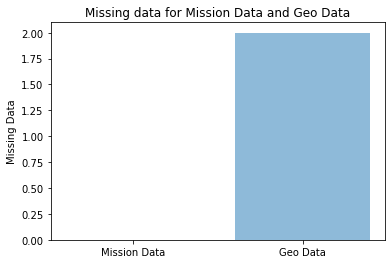

In [19]:
# Plot for Mission Data and Geo Data
objects = ('Mission Data', 'Geo Data')
y_pos = np.arange(len(objects))
performance = [(r_m-r_m_nm),(r_g-r_g_nm)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Missing Data')
plt.title('Missing data for Mission Data and Geo Data')

plt.show()

##### Are there geographic differences in robot usage?

To visualize this information, at first, we shall group by robotid based on their 'country_cd'/'timezone' feature. Then we shall check the 'nmssn' and 'runm' feature of each group members. All these information will provide data about the geography difference that effect on the robot performance.

In [47]:
# Group by 'robotid' using 'country_cd' feature from Geo Data Frame
cd_geo_nm_df=geo_nm_df.groupby(['country_cd'])
print(cd_geo_nm_df.size())
# Access the group Members of country_cd in a Data Frame
# for name, group in cd_geo_df['robotid']:
#     print(cd_geo_df['robotid'].get_group((name)))

country_cd
AD      1
AE      5
AG      1
AR     16
AT    293
     ... 
US    238
UY      5
VE      1
VN      4
ZA      2
Length: 84, dtype: int64


Text(0, 0.5, 'number of robot used')

<Figure size 432x288 with 0 Axes>

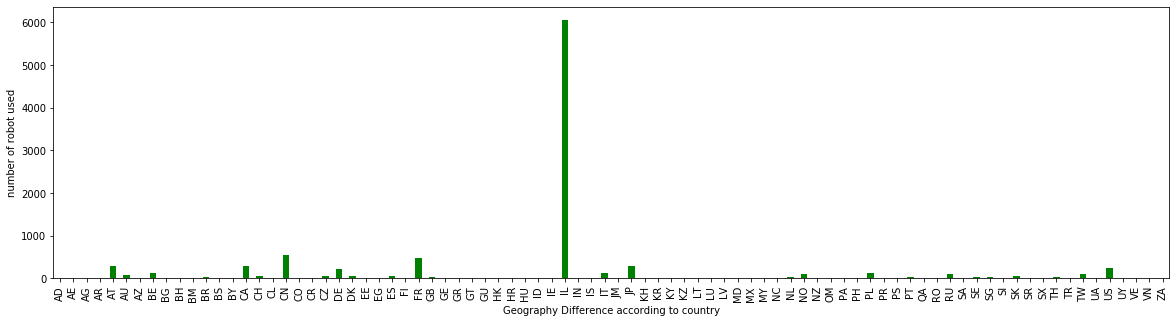

In [68]:
# Plotting the number of robot according to the Geography difference
plt.clf()
# ax = plt.gca()
fig, ax = plt.subplots(figsize=(20, 5))
cd_geo_nm_df.size().plot(kind='bar',color='green')
ax.set_xlabel("Geography Difference according to country")
ax.set_ylabel("number of robot used")

The size of each group is different according to the geography difference.

In [39]:
# Group by 'robotid' using 'nmssn' feature from Mission Data Frame
robotid_mission_grouped_df = mission_nm_df.groupby(['robotid']).mean()
# print(robotid_mission_grouped_df.loc['T29NF13ZIYISNF79','nmssn'])
# print(robotid_mission_grouped_df.iloc[2:4,1].mean())

50.73958333333333


Here, we shall findout the mean 'nmssn' of each group. Therefore, we can compare the geo difference.

In [80]:
# # Access the group Members of country_cd in cd_geo_df
group_cd=[]
group_cd_nmssn_mean=[]

for name, group in cd_geo_nm_df['robotid']:
#     print('===============================')
#     print(name)
    group_cd.append(name)
#     print('-------------------------------')
#     print(group)
#     print('===============================')
#     print(robotid_mission_grouped_df.loc[cd_geo_nm_df['robotid'].get_group((name)),'nmssn'].mean())
    group_cd_nmssn_mean.append(robotid_mission_grouped_df.loc[cd_geo_nm_df['robotid'].get_group((name)),'nmssn'].mean())
#     group_cd_nmssn=group_cd_nmssn.append(x)
#     group_cd_nmssn[i]=[robotid_mission_grouped_df.loc[cd_geo_df['robotid'].get_group((name)),'nmssn'].mean()]
#     print(cd_geo_df['robotid'].get_group((name)))

C:\Users\MdKhurramMonirRabby\Anaconda3\lib\site-packages\pandas\core\indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


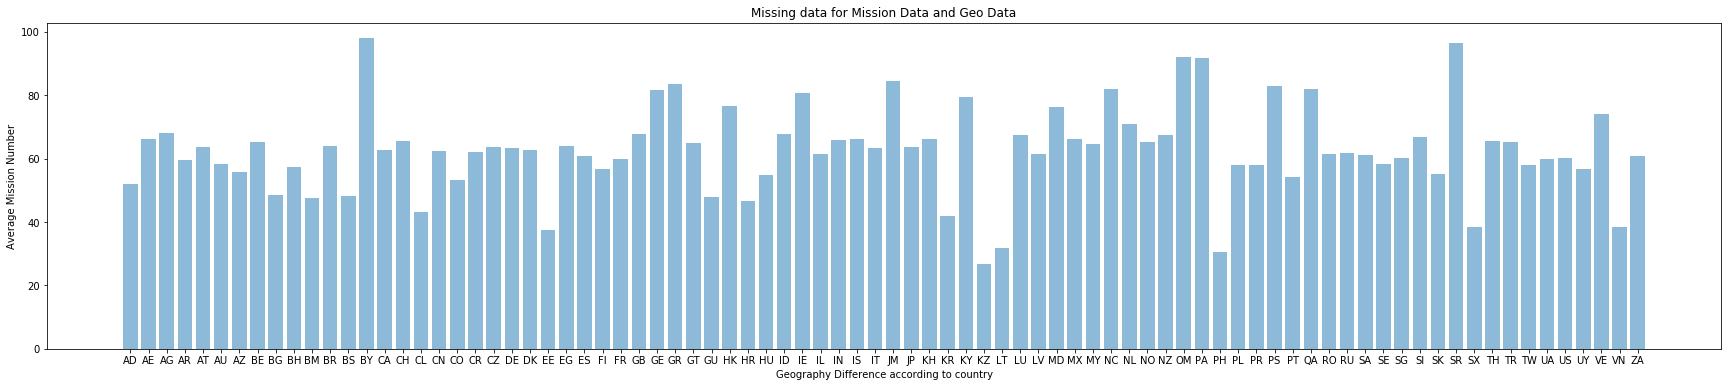

In [91]:
# print(group_cd)
# print(group_cd_nmssn_mean)


# Plot for Mission Data and Geo Data
objects = group_cd
y_pos = np.arange(len(objects))
performance = group_cd_nmssn_mean

fig= plt.figure(figsize=(30,6))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average Mission Number')
plt.xlabel('Geography Difference according to country')
plt.title('Missing data for Mission Data and Geo Data')

plt.show()

                       nmssn       runm     chrgm     pausem
robotid                                                     
000NG2FMLJBT9ANZ   42.800000  57.000000  9.400000   5.400000
000Y9NBMJ77LQ7S7   58.000000  54.571429  0.000000   6.142857
006Q50H53GXM7BYO   41.666667  47.750000  5.305556   6.916667
00EZQ4MZ6JLQPJK6  101.291667  53.729167  3.020833   5.250000
00KI1HU70Y15Z10K   92.035714  55.821429  4.928571   2.535714
...                      ...        ...       ...        ...
ZZ15EKWDBZBUNLOE  100.071429  55.000000  2.185714   3.685714
ZZ6UI6ZTJ09NSKY5   72.615385  46.384615  0.692308   3.692308
ZZNOFTIZUGAHMRXX   22.000000  47.000000  9.200000  11.800000
ZZNZ8XWEB39GL4XR   85.166667  45.055556  2.722222   3.722222
ZZUJVI3GXRLIG0MT   65.586207  45.827586  4.482759   5.344828

[9826 rows x 4 columns]


###### - Consider all descriptive features of a mission, including when and how frequently it occurred.

Comparing the datetime feature of each robot to country_cd, we can see the operation period and to the nmssn, we can calculate the frequency of the operation.

###### - If applicable, comment on how trends in these features might impact design decisions for the hardware, battery, or navigation algorithms of robots sold in different regions.

We can predict the battery condition by analyzing the charging period/frequency of each robot. Moreover, the pausem and outcome feature provide us the information regarding the hardware, i.e.how much the robot is reliable. In addition to that the nmssn feature provides us the information about the navigation performance of each robot. All these information can be plotted with respect to the country_cd to identify the effect of geography on the robotid.

### Tasks-2: Calculate the time between consecutive missions for each robot ("inter -mission interval" or "IMI"). Describe any interesting relationships between IMI and other 
features of robot behavior.

The IMI is calculated based on the datatime from the 'mission_df'. Here it is seen that after completing one mission the robot requires a fixed amount of time that is more than the charging period. Also, if the robot does not get enough time that is supposed to be considered as the maintenance period, the mission is either canceled or delayed for most of the cases.  

### Tasks-3 (**BONUS**): We are aware that data loss exists among the mission records, but are unsure of the cause. Quantify the extent of the loss, differentiating between discrete catastrophic events and random mission loss for individual robots. Investigate whether this loss is uniform or whether it may be impacting other analyses.

In [24]:
# Missing Data for Mission Data Frame
r_m, c_m=mission_df.shape
r_m_nm, c_m_nm=mission_nm_df.shape

if (r_m-r_m_nm)==0:
    print('There is no missing data for Mission Data Frame')
else:
    print('Missing data for Mission:',(r_m-r_m_nm))   
    mission_null_df = mission_df[mission_df.isnull().any(axis=1)]
    print(mission_null_df)


There is no missing data for Mission Data Frame


In [25]:
# Missing Data for Geo Data Frame
r_g, c_g=geo_df.shape
r_g_nm, c_g_nm=geo_nm_df.shape

if (r_g-r_g_nm)==0:
    print('There is no missing data for Mission Data Frame')
else:
    print('Missing data for Mission:',(r_g-r_g_nm))   
    geo_null_df = geo_df[geo_df.isnull().any(axis=1)]
    print(geo_null_df)

Missing data for Mission: 2
     country_cd         timezone           robotid
6091        NaN     Europe/Vaduz  QMJXZLREE88GULA1
6363        NaN  Africa/Windhoek  Z9JJM7JRIGJYLER2


Here, we shall check the feature of the missing robotid with other robotid and then classify them according to the closely matched robot which has valid country_cd information and put them in that group. As this is the classification problem because we have labeled information from other robot and using that model we can predict the missiong information following 